In [1]:
import numpy as np
from numpy import ndarray
from typing import Callable, Dict, Tuple, List

In [2]:
# Linear Regression
def forward_linear_regression(X_batch: ndarray, y_batch: ndarray, weights: Dict[str, ndarray]) -> Tuple[float, Dict[str, ndarray]]:
    assert X_batch.shape[0] == y_batch.shape[0], "X and y batches number of rows do not match"
    assert X_batch.shape[1] == weights["W"].shape[0], "X batch number of columns and weights number of rows do not match"
    assert weights["B"].shape[0] == weights["W"].shape[1] == 1, "B number of rows and W number of columns different from 1"

    N = np.dot(X_batch, weights["W"])
    P = N + weights["B"]
    loss = np.mean(np.power(y_batch - P, 2))

    # save the information computed on the forward pass
    forward_info = {
        "X": X_batch,
        "N": N,
        "P": P,
        "y": y_batch,
    }

    return loss, forward_info

X_batch = np.array([
    [0, 1, 2], # X1
    [3, 4, 5], # X2
    [5, 6, 7], # X3
])

weights = {
    # "B": np.array([[2], [2], [2]]),
    "B": np.array([[2]]), # will be broadcasted as if np.array([[2], [2], [2]])
    # "B": np.array([2]), # will be broadcasted as if np.array([[2], [2], [2]])
    "W": np.array([
        # W1
        [1], 
        [2], 
        [3],
    ]),
}

y_batch = np.array([
    [11],
    [27],
    [41],
])

loss, forward_info = forward_linear_regression(X_batch, y_batch, weights)
loss, forward_info

(1.0,
 {'X': array([[0, 1, 2],
         [3, 4, 5],
         [5, 6, 7]]),
  'N': array([[ 8],
         [26],
         [38]]),
  'P': array([[10],
         [28],
         [40]]),
  'y': array([[11],
         [27],
         [41]])})

In [3]:
# Calculating the Gradients
def loss_gradients(forward_info: Dict[str, ndarray], weights: Dict[str, ndarray]) -> Dict[str, ndarray]:
    dLdP = -2 * (forward_info["y"] - forward_info["P"])
    dPdN = np.ones_like(forward_info["N"])
    dLdN = dLdP * dPdN
    dNdW = np.transpose(forward_info["X"])
    dLdW = np.dot(dNdW, dLdN)

    dPdB = np.ones_like(weights["B"])
    dLdB = dLdP * dPdB
    B = dLdB.sum(axis=0) # axis sum due to 1-dim B (?)

    # intermediate results added to B and W for debugging purposes
    loss_gradients = {
        "dLdP": dLdP,
        "dPdN": dPdN,
        "dLdN": dLdN,
        "dNdW": dNdW,
        "W": dLdW,
        "dPdB": dPdB,
        "dLdB": dLdB,
        "B": B, 
    }
    return loss_gradients

loss_gradients(forward_info, weights)

{'dLdP': array([[-2],
        [ 2],
        [-2]]),
 'dPdN': array([[1],
        [1],
        [1]]),
 'dLdN': array([[-2],
        [ 2],
        [-2]]),
 'dNdW': array([[0, 3, 5],
        [1, 4, 6],
        [2, 5, 7]]),
 'W': array([[-4],
        [-6],
        [-8]]),
 'dPdB': array([[1]]),
 'dLdB': array([[-2],
        [ 2],
        [-2]]),
 'B': array([-2])}

In [4]:
# Using These Gradients to Train the Model
def init_weights(n_in: int) -> Dict[str, ndarray]:
    weights = {
        "W": np.random.randn(n_in, 1),
        "B": np.random.randn(1, 1),
    }
    return weights

init_weights(3)

{'W': array([[ 0.03054188],
        [-1.31444608],
        [-1.29785351]]),
 'B': array([[-0.05014929]])}

In [5]:
def permute_data(X: ndarray, y: ndarray):
    perm = np.random.permutation(X.shape[0])
    return X[perm], y[perm], perm

X = np.array([
    [0, 1, 2], # X1
    [3, 4, 5], # X2
    [5, 6, 7], # X3
])

y = np.array([
    [11],
    [27],
    [41],
])

permute_data(X, y)

(array([[5, 6, 7],
        [3, 4, 5],
        [0, 1, 2]]),
 array([[41],
        [27],
        [11]]),
 array([2, 1, 0]))

In [6]:
Batch = Tuple[ndarray, ndarray]

def generate_batch(X: ndarray, y: ndarray, start: int = 0, batch_size: int = 10) -> Batch:
    assert X.ndim == y.ndim == 2, "X and Y must be 2 dimensional"
    if start+batch_size > X.shape[0]:
        batch_size = X.shape[0] - start    
    X_batch, y_batch = X[start:start+batch_size], y[start:start+batch_size]    
    return X_batch, y_batch
    
X = np.array([
    [0, 1, 2], # X1
    [3, 4, 5], # X2
    [5, 6, 7], # X3
])

y = np.array([
    [11],
    [27],
    [41],
])

generate_batch(X, y, 0, 2)

(array([[0, 1, 2],
        [3, 4, 5]]),
 array([[11],
        [27]]))

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data
target = boston.target
features = boston.feature_names
data[0:3], target[0:3], features[0:3]

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
         6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
         1.5300e+01, 3.9690e+02, 4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
         6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
         1.7800e+01, 3.9690e+02, 9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
         7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
         1.7800e+01, 3.9283e+02, 4.0300e+00]]),
 array([24. , 21.6, 34.7]),
 array(['CRIM', 'ZN', 'INDUS'], dtype='<U7'))

In [8]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data = s.fit_transform(data)
data[0:3]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ]])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=80718)
X_train[0:3], X_test[0:3], y_train[0:3], y_test[0:3]

(array([[-0.41248185, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
          1.22857665, -0.51117971,  1.07773662, -0.75292215, -1.10611514,
          0.1130321 ,  0.44105193, -1.02650148],
        [ 5.53032093, -0.48772236,  1.01599907, -0.27259857,  0.36544404,
         -0.75169891,  1.11749449, -1.13234958,  1.66124525,  1.53092646,
          0.80657583, -3.88219457, -0.3564708 ],
        [ 9.9339306 , -0.48772236,  1.01599907, -0.27259857,  1.00468047,
          0.97356275,  0.82945385, -1.13068579,  1.66124525,  1.53092646,
          0.80657583,  0.44105193,  0.63876307]]),
 array([[-0.41643272,  3.5896366 , -1.23392304, -0.27259857, -1.19722987,
          2.23438568, -1.25795172,  0.62889308, -0.6379618 , -1.09423658,
         -1.73641788,  0.39587878, -1.23956563],
        [ 1.65868822, -0.48772236,  1.01599907, -0.27259857,  1.00468047,
         -0.08780796,  1.11749449, -1.14513701,  1.66124525,  1.53092646,
          0.80657583,  0.40640456,  1.27935726],
        [ 0.2

In [10]:
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)
y_train[0:3], y_test[0:3]

(array([[36.2],
        [15. ],
        [10.4]]),
 array([[48.5],
        [10.2],
        [15.2]]))

In [11]:
def train(X: ndarray, 
          y: ndarray, 
          n_iter: int = 1000,
          learning_rate: float = 0.001,
          batch_size: int = 23,
          return_losses: bool = True, 
          return_weights: bool = True, 
          seed: int = 180708) -> None:
    if seed:
        np.random.seed(seed)
    start = 0
    weights = init_weights(X.shape[1])
    X, y, dummy = permute_data(X, y)
    losses = []
    for i in range(n_iter):
        if start >= X.shape[0]:
            X, y, dummy = permute_data(X, y)
            start = 0
        X_batch, y_batch = generate_batch(X, y, start, batch_size)
        start += batch_size
        loss, forward_info = forward_linear_regression(X_batch, y_batch, weights)
        if return_losses:
            losses.append(loss)
        loss_grads = loss_gradients(forward_info, weights)
        for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]
    
    if return_weights:
        return losses, weights

train_info = train(X_train, y_train)
losses, weights = train_info
losses[0:3], "...", losses[-3:], weights

([813.2098258057695, 707.3600829629216, 419.780274960034],
 '...',
 [36.717795915470546, 14.400552796770944, 12.46628339805241],
 {'W': array([[-1.09542534],
         [ 0.73529155],
         [ 0.19771754],
         [ 0.74750455],
         [-2.28494893],
         [ 2.20059621],
         [ 0.7194554 ],
         [-2.6384484 ],
         [ 2.53576919],
         [-1.68915096],
         [-2.31624663],
         [ 0.84352868],
         [-4.25526828]]),
  'B': array([[22.63115155]])})

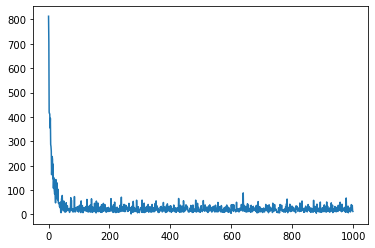

In [12]:
import matplotlib.pyplot as plt
plt.plot(list(range(1000)), losses)

In [13]:
# Assessing Our Model
def predict(X: ndarray, weights: Dict[str, ndarray]):
    N = np.dot(X, weights["W"])
    P = N + weights["B"]
    return P

preds = predict(X_test, weights)
preds[0:3]

array([[40.22846109],
       [16.44632103],
       [19.35425437]])

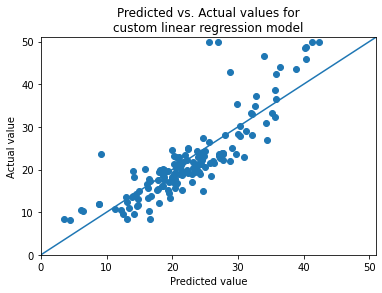

In [14]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\ncustom linear regression model")
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51])

In [15]:
def mae(preds: ndarray, actuals: ndarray):
    return np.mean(np.abs(preds - actuals))
    
"Mean absolute error", round(mae(preds, y_test), 4)

('Mean absolute error', 3.5644)

In [16]:
def rmse(preds: ndarray, actuals: ndarray):
    return np.sqrt(np.mean(np.power(preds - actuals, 2)))

"Root mean squared error", round(rmse(preds, y_test), 4)

('Root mean squared error', 5.0497)

In [17]:
"Mean", np.round(y_test.mean(), 4)

('Mean', 22.0776)

In [18]:
"RMSE / Mean", np.round(rmse(preds, y_test) / y_test.mean(), 4)

('RMSE / Mean', 0.2287)

In [19]:
"Weights", np.round(weights['W'].reshape(-1), 4)

('Weights',
 array([-1.0954,  0.7353,  0.1977,  0.7475, -2.2849,  2.2006,  0.7195,
        -2.6384,  2.5358, -1.6892, -2.3162,  0.8435, -4.2553]))

In [20]:
# Analyzing the Most Important Feature
NUM = 40
a = np.repeat(X_test[:, :-1].mean(axis=0, keepdims=True), NUM, axis=0) # weights average excluding last one (the most important)
b = np.linspace(-1.5, 3.5, NUM).reshape(NUM, 1)
test_feature = np.concatenate([a, b], axis=1)
X_test[0:3], a[0:3], b[0:3], test_feature[0:3], test_feature[0:3, -1]

(array([[-0.41643272,  3.5896366 , -1.23392304, -0.27259857, -1.19722987,
          2.23438568, -1.25795172,  0.62889308, -0.6379618 , -1.09423658,
         -1.73641788,  0.39587878, -1.23956563],
        [ 1.65868822, -0.48772236,  1.01599907, -0.27259857,  1.00468047,
         -0.08780796,  1.11749449, -1.14513701,  1.66124525,  1.53092646,
          0.80657583,  0.40640456,  1.27935726],
        [ 0.21268563, -0.48772236,  1.01599907, -0.27259857,  1.36749033,
          0.52764458,  1.05348546, -0.68445678,  1.66124525,  1.53092646,
          0.80657583, -0.01517502,  0.71165343]]),
 array([[-0.00941651,  0.00980579, -0.00817894,  0.09038795,  0.0453655 ,
         -0.03046545,  0.01654386, -0.01880801,  0.01095914,  0.00738318,
          0.050674  ,  0.03445097],
        [-0.00941651,  0.00980579, -0.00817894,  0.09038795,  0.0453655 ,
         -0.03046545,  0.01654386, -0.01880801,  0.01095914,  0.00738318,
          0.050674  ,  0.03445097],
        [-0.00941651,  0.00980579, -0.0

In [21]:
test_preds = predict(test_feature, weights)[:, 0]
test_preds[0:3]

array([28.91535942, 28.36981221, 27.82426499])

Text(0.5, 1.0, 'Most important feature vs. target and predictions,\n custom linear regression')

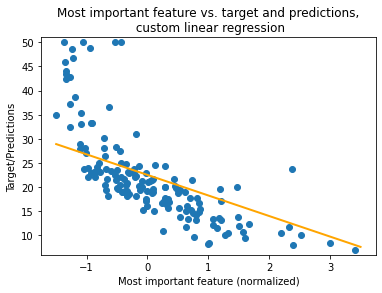

In [22]:
plt.scatter(X_test[:, 12], y_test)
plt.plot(test_feature[:, -1], test_preds, linewidth=2, c='orange')
plt.ylim([6, 51])
plt.xlabel("Most important feature (normalized)")
plt.ylabel("Target/Predictions")
plt.title("Most important feature vs. target and predictions,\n custom linear regression")

Text(0, 0.5, 'sigmoid(x)')

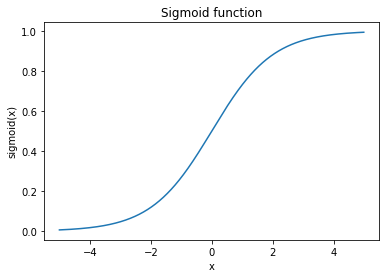

In [23]:
# A Nonlinear Function
def sigmoid(x: ndarray):
    return 1 / (1 + np.exp(-x)) # [-inf, inf] -> [0, 1]

x = np.arange(-5, 5, 0.01)
plt.plot(x, sigmoid(x))
plt.title("Sigmoid function")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")

In [24]:
# Neural Networks from Scratch
def init_weights(input_size: int, hidden_size: int) -> Dict[str, ndarray]:
    weights = {
        "W1": np.random.randn(input_size, hidden_size),
        "B1": np.random.randn(1, hidden_size),
        "W2": np.random.randn( hidden_size, 1),
        "B2": np.random.randn(1, 1),
    }
    return weights
    
weights = init_weights(3, 2)
weights

{'W1': array([[ 0.32291096, -1.61019269],
        [-0.83644989,  0.39131454],
        [ 0.86271407, -0.01718347]]),
 'B1': array([[ 0.47695283, -0.23854252]]),
 'W2': array([[1.77505813],
        [0.49117771]]),
 'B2': array([[-1.00976816]])}

In [25]:
for key in weights.keys():
    weights[key] *= 10

weights

{'W1': array([[  3.22910964, -16.10192691],
        [ -8.36449891,   3.91314543],
        [  8.62714067,  -0.17183471]]),
 'B1': array([[ 4.76952829, -2.38542524]]),
 'W2': array([[17.75058125],
        [ 4.91177707]]),
 'B2': array([[-10.09768157]])}

In [26]:
def forward_loss(X: ndarray, y: ndarray, weights: Dict[str, ndarray]) -> Tuple[float, Dict[str, ndarray]]:
    M1 = np.dot(X, weights["W1"])
    N1 = M1 + weights["B1"]
    O1 = sigmoid(N1)
    M2 = np.dot(O1, weights["W2"])
    P = M2 + weights["B2"]
    loss = np.mean(np.power(y - P, 2))

    # save the information computed on the forward pass
    forward_info = {
        "X": X,
        "M1": M1,
        "N1": N1,
        "O1": O1,
        "M2": M2,
        "P": P,
        "y": y,
    }

    return loss, forward_info

X = np.array([
    [0, 1, 2], # X1
    [3, 4, 5], # X2
])

weights = {
    "B1": np.array([[2, 2.1, 2.2]]), # will be broadcasted
    "W1": np.array([
        # W1
        [1, 1.1, 1.2], 
        [2, 2.1, 2.2], 
        [3, 3.1, 3.2],
    ]),
    "B2": np.array([[2]]), # will be broadcasted
    "W2": np.array([
        # W1
        [1], 
        [2], 
        [3],
    ]),
}

y = np.array([
    [11],
    [27],
])

loss, forward_info = forward_loss(X, y, weights)
loss, forward_info

(185.0005023887774,
 {'X': array([[0, 1, 2],
         [3, 4, 5]]),
  'M1': array([[ 8. ,  8.3,  8.6],
         [26. , 27.2, 28.4]]),
  'N1': array([[10. , 10.4, 10.8],
         [28. , 29.3, 30.6]]),
  'O1': array([[0.9999546 , 0.99996957, 0.9999796 ],
         [1.        , 1.        , 1.        ]]),
  'M2': array([[5.99983254],
         [6.        ]]),
  'P': array([[7.99983254],
         [8.        ]]),
  'y': array([[11],
         [27]])})

In [27]:
def loss_gradients(forward_info: Dict[str, ndarray], weights: Dict[str, ndarray]) -> Dict[str, ndarray]:
    dLdP = -2 * (forward_info["y"] - forward_info["P"])
    dPdM2 = np.ones_like(forward_info["M2"])
    dLdM2 = dLdP * dPdM2

    dPdB2 = np.ones_like(weights["B2"])
    dLdB2 = dLdP * dPdB2
    B2 = dLdB2.sum(axis=0) # axis sum due to 1-dim B2 (?)
    
    dM2dW2 = np.transpose(forward_info["O1"])
    dLdW2 = np.dot(dM2dW2, dLdM2) # error in book: np.dot(dM2dW2, dLdP)

    dM2dO1 = np.transpose(weights["W2"])
    dLdO1 = np.dot(dLdM2, dM2dO1)

    dO1dN1 = sigmoid(forward_info["N1"]) * (1 - sigmoid(forward_info["N1"]))
    dLdN1 = dLdO1 * dO1dN1

    dN1dB1 = np.ones_like(weights["B1"])
    dLdB1 = dLdN1 * dN1dB1
    B1 = dLdB1.sum(axis=0) # axis sum due to 1-dim B1 (?)

    dN1dM1 = np.ones_like(forward_info["M1"])
    dLdM1 = dLdN1 * dN1dM1
    
    dM1dW1 = np.transpose(forward_info["X"])
    dLdW1 = np.dot(dM1dW1, dLdM1)

    # intermediate results added to B1, B2, W1 and W2 for debugging purposes
    loss_gradients = {
        "dLdP": dLdP,
        "dPdM2": dPdM2,
        "dLdM2": dLdM2,
        "dPdB2": dPdB2,
        "dLdB2": dLdB2,
        "B2": B2,
        "dM2dW2": dM2dW2,
        "W2": dLdW2,
        "dM2dO1": dM2dO1,
        "dLdO1": dLdO1,
        "dO1dN1": dO1dN1,
        "dLdN1": dLdN1,
        "dLdN1": dLdN1,
        "dN1dB1": dN1dB1,
        "dLdB1": dLdB1,
        "B1": B1,
        "dN1dM1": dN1dM1,
        "dLdM1": dLdM1,
        "dM1dW1": dM1dW1,
        "W1": dLdW1,
    }
    return loss_gradients

loss_gradients(forward_info, weights)

{'dLdP': array([[ -6.00033492],
        [-38.        ]]),
 'dPdM2': array([[1.],
        [1.]]),
 'dLdM2': array([[ -6.00033492],
        [-38.        ]]),
 'dPdB2': array([[1]]),
 'dLdB2': array([[ -6.00033492],
        [-38.        ]]),
 'B2': array([-44.00033492]),
 'dM2dW2': array([[0.9999546 , 1.        ],
        [0.99996957, 1.        ],
        [0.9999796 , 1.        ]]),
 'W2': array([[-44.00006251],
        [-44.00015232],
        [-44.00021252]]),
 'dM2dO1': array([[1, 2, 3]]),
 'dLdO1': array([[  -6.00033492,  -12.00066983,  -18.00100475],
        [ -38.        ,  -76.        , -114.        ]]),
 'dO1dN1': array([[4.53958077e-05, 3.04306308e-05, 2.03986712e-05],
        [6.91446900e-13, 1.88515870e-13, 5.12923037e-14]]),
 'dLdN1': array([[-2.72390050e-04, -3.65187953e-04, -3.67196576e-04],
        [-2.62749822e-11, -1.43272061e-11, -5.84732263e-12]]),
 'dN1dB1': array([[1., 1., 1.]]),
 'dLdB1': array([[-2.72390050e-04, -3.65187953e-04, -3.67196576e-04],
        [-2.62749822

In [28]:
# Training and Assessing Our First Neural Network
def predict(X: ndarray, weights: Dict[str, ndarray]):
    M1 = np.dot(X, weights["W1"])
    N1 = M1 + weights["B1"]
    O1 = sigmoid(N1)
    M2 = np.dot(O1, weights["W2"])
    P = M2 + weights["B2"]
    return P

preds = predict(X, weights)
preds[0:3]

array([[7.99983254],
       [8.        ]])

In [29]:
from sklearn.metrics import r2_score
def train(X_train: ndarray, y_train: ndarray,
          X_test: ndarray, y_test: ndarray,
          n_iter: int = 10000,
          test_every: int = 1000,
          learning_rate: float = 0.001,
          hidden_size= 13,
          batch_size: int = 23,
          return_losses: bool = True, 
          return_weights: bool = True, 
          return_scores: bool = True,
          seed: int = 80718) -> None:
    if seed:
        np.random.seed(seed)
    start = 0
    weights = init_weights(X_train.shape[1], hidden_size=hidden_size)
    X_train, y_train, dummy = permute_data(X_train, y_train)
    losses = []
    val_scores = []
    for i in range(n_iter):
        if start >= X_train.shape[0]:
            X_train, y_train, dummy = permute_data(X_train, y_train)
            start = 0
        X_batch, y_batch = generate_batch(X_train, y_train, start, batch_size)
        start += batch_size
        loss, forward_info = forward_loss(X_batch, y_batch, weights)
        if return_losses:
            losses.append(loss)
        loss_grads = loss_gradients(forward_info, weights)
        for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]

        if return_scores:
            if i % test_every == 0 and i != 0:
                preds = predict(X_test, weights)
                val_scores.append(r2_score(preds, y_test))
    
    if return_weights:
        return losses, weights, val_scores

num_iter = 10000
test_every = 1000
train_info = train(X_train, y_train, X_test, y_test)
losses, weights, val_scores = train_info
losses[0:3], "...", losses[-3:], weights, val_scores

([426.30672462353016, 257.09767743376045, 322.0176539081928],
 '...',
 [2.793510933992591, 2.9542873471271527, 2.696866298098097],
 {'W1': array([[ 0.65678888,  0.84521174, -0.39761464, -0.31791409, -0.12544337,
          -3.31341017,  1.4522736 ,  0.44698258,  0.25639884, -2.04076178,
          -0.75010515,  0.01339349, -1.36785315],
         [-1.23411664, -1.32934604,  1.31495353,  1.79756231, -1.12922995,
           0.86301251, -0.7469492 ,  1.7204576 , -0.82665718, -3.09268716,
           2.21093201, -0.24021925,  2.06643205],
         [ 2.23995808,  2.18121084, -1.29217366,  0.1237881 ,  1.69275922,
          -2.92408261, -0.53381278,  0.34794185,  1.77946018,  1.78457836,
          -2.56651902, -0.29165494,  1.01419355],
         [-0.38863947,  0.24047845, -0.96219274,  1.68130146,  1.04605123,
          -0.76783721, -1.09420791,  0.82914972,  2.33824062, -0.82901057,
          -4.62698759, -0.51539062,  0.2779063 ],
         [ 2.79745601, -2.45894586,  0.63841419,  1.98622806,  

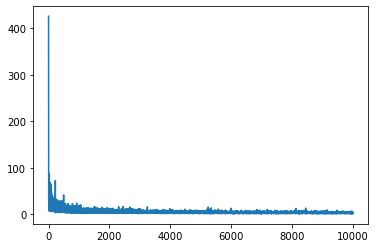

In [30]:
plt.plot(list(range(10000)), losses)

In [31]:
preds = predict(X_test, weights)
preds[0:3]

array([[52.97588022],
       [10.75405224],
       [15.41709068]])

In [32]:
"Mean", np.round(y_test.mean(), 4)

('Mean', 22.0776)

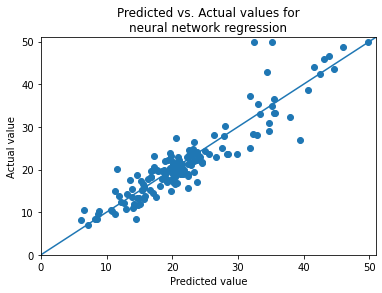

In [33]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\nneural network regression")
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51])

In [34]:
"Mean absolute error", round(mae(preds, y_test), 4)

('Mean absolute error', 2.4913)

In [35]:
"Root mean squared error", round(rmse(preds, y_test), 4)

('Root mean squared error', 3.5573)

In [36]:
"Mean", np.round(y_test.mean(), 4)

('Mean', 22.0776)

In [37]:
"RMSE / Mean", np.round(rmse(preds, y_test) / y_test.mean(), 4)

('RMSE / Mean', 0.1611)

In [38]:
"W1", weights['W1']

('W1',
 array([[ 0.65678888,  0.84521174, -0.39761464, -0.31791409, -0.12544337,
         -3.31341017,  1.4522736 ,  0.44698258,  0.25639884, -2.04076178,
         -0.75010515,  0.01339349, -1.36785315],
        [-1.23411664, -1.32934604,  1.31495353,  1.79756231, -1.12922995,
          0.86301251, -0.7469492 ,  1.7204576 , -0.82665718, -3.09268716,
          2.21093201, -0.24021925,  2.06643205],
        [ 2.23995808,  2.18121084, -1.29217366,  0.1237881 ,  1.69275922,
         -2.92408261, -0.53381278,  0.34794185,  1.77946018,  1.78457836,
         -2.56651902, -0.29165494,  1.01419355],
        [-0.38863947,  0.24047845, -0.96219274,  1.68130146,  1.04605123,
         -0.76783721, -1.09420791,  0.82914972,  2.33824062, -0.82901057,
         -4.62698759, -0.51539062,  0.2779063 ],
        [ 2.79745601, -2.45894586,  0.63841419,  1.98622806,  1.69204721,
          2.16489752,  1.94030471, -2.51160505, -0.23932121, -1.31352604,
          4.40150231, -5.90651322, -5.88798844],
        

In [39]:
# W2[7] is the biggest weight
"W2", weights['W2']

('W2',
 array([[ 4.6633565 ],
        [ 6.53224818],
        [ 4.36299479],
        [ 5.39490708],
        [ 5.37213116],
        [ 5.68005356],
        [ 3.30410406],
        [10.0212828 ],
        [ 7.19587519],
        [ 3.24808149],
        [ 4.99448033],
        [ 9.64493966],
        [ 8.03937485]]))

In [40]:
# combinations of W1 weights from the 7th column corresponding to W2[7] 
np.round(weights['W1'][:, 7], 4) # error in book: weights['W1'][7]

array([ 0.447 ,  1.7205,  0.3479,  0.8291, -2.5116, -0.7002,  2.0018,
       -2.1192,  0.6686,  1.3185, -0.9263,  0.8459, -3.516 ])

In [41]:
np.round(weights['W1'][:, 11], 4)

array([ 0.0134, -0.2402, -0.2917, -0.5154, -5.9065, -0.1848, -0.8691,
       -7.3157,  5.22  , -2.3485, -2.7032, -1.8994, -2.1654])

In [42]:
# Two Reasons Why This Is Happening
NUM = 40
a = np.repeat(X_test[:, :-1].mean(axis=0, keepdims=True), NUM, axis=0) # weights average excluding last one (the most important)
b = np.linspace(-1.5, 3.5, NUM).reshape(NUM, 1)
test_feature = np.concatenate([a, b], axis=1)
X_test[0:3], a[0:3], b[0:3], test_feature[0:3], test_feature[0:3, -1]

(array([[-0.41643272,  3.5896366 , -1.23392304, -0.27259857, -1.19722987,
          2.23438568, -1.25795172,  0.62889308, -0.6379618 , -1.09423658,
         -1.73641788,  0.39587878, -1.23956563],
        [ 1.65868822, -0.48772236,  1.01599907, -0.27259857,  1.00468047,
         -0.08780796,  1.11749449, -1.14513701,  1.66124525,  1.53092646,
          0.80657583,  0.40640456,  1.27935726],
        [ 0.21268563, -0.48772236,  1.01599907, -0.27259857,  1.36749033,
          0.52764458,  1.05348546, -0.68445678,  1.66124525,  1.53092646,
          0.80657583, -0.01517502,  0.71165343]]),
 array([[-0.00941651,  0.00980579, -0.00817894,  0.09038795,  0.0453655 ,
         -0.03046545,  0.01654386, -0.01880801,  0.01095914,  0.00738318,
          0.050674  ,  0.03445097],
        [-0.00941651,  0.00980579, -0.00817894,  0.09038795,  0.0453655 ,
         -0.03046545,  0.01654386, -0.01880801,  0.01095914,  0.00738318,
          0.050674  ,  0.03445097],
        [-0.00941651,  0.00980579, -0.0

In [43]:
preds_test = predict(test_feature, weights)[:, 0]
preds_test[0:3]

array([21.74101456, 21.02921986, 20.41525059])

Text(0.5, 1.0, 'Most important feature vs. target and predictions,\n neural network regression')

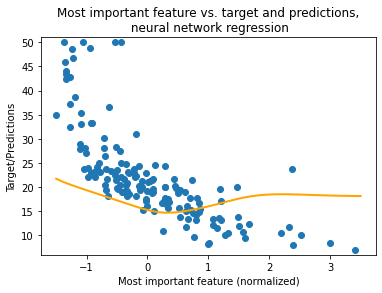

In [44]:
plt.scatter(X_test[:, 12], y_test)
plt.plot(test_feature[:, -1], preds_test, linewidth=2, c='orange')
plt.ylim([6, 51])
plt.xlabel("Most important feature (normalized)")
plt.ylabel("Target/Predictions")
plt.title("Most important feature vs. target and predictions,\n neural network regression")

In [45]:
# Learning rate tuning
def r2_score_lr(learning_rate):
    train_info = train(X_train, y_train, X_test, y_test,
                   n_iter=100, # 100000 takes too long to execute!
                   test_every = 100, # 100000
                   learning_rate = learning_rate,
                   batch_size=23, 
                   return_losses=False, 
                   return_weights=True, 
                   return_scores=False,
                   seed=80718)
    weights = train_info[1]
    preds = predict(X_test, weights)
    return r2_score(y_test, preds)

In [46]:
lrs = np.geomspace(1e-2, 1e-6, num=20)
lrs

array([1.00000000e-02, 6.15848211e-03, 3.79269019e-03, 2.33572147e-03,
       1.43844989e-03, 8.85866790e-04, 5.45559478e-04, 3.35981829e-04,
       2.06913808e-04, 1.27427499e-04, 7.84759970e-05, 4.83293024e-05,
       2.97635144e-05, 1.83298071e-05, 1.12883789e-05, 6.95192796e-06,
       4.28133240e-06, 2.63665090e-06, 1.62377674e-06, 1.00000000e-06])

In [47]:
r2s = [r2_score_lr(lr) for lr in lrs]
r2s

[0.792420698753929,
 0.8193769849002337,
 0.8455712787224426,
 0.8260906931954685,
 0.7938823192114826,
 0.7583201116186248,
 0.7132569307423999,
 0.6597304678567426,
 0.585200849903068,
 0.4890322195894917,
 0.3199419527311592,
 -0.15286486810950262,
 -0.9925673188317055,
 -1.846256980459542,
 -2.528959117927759,
 -3.02410397438602,
 -3.3635402686581743,
 -3.587613543718339,
 -3.7318544328467684,
 -3.8231960411294823]

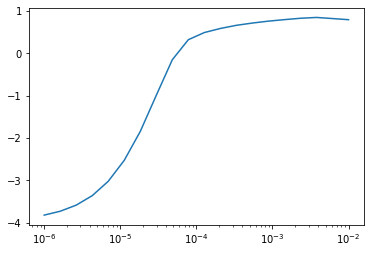

In [48]:
plt.semilogx(lrs, r2s)